In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [12]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [56]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [243]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [248]:
# Set random seed
tf.random.set_seed(42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="elu"), 
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid") 
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# Fit the model
#class_weight = {0: 0.2, 1: 0.8}
history = model.fit(X_train, y_train, epochs=100,  validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 21ms/step - loss: 0.5746 - accuracy: 0.7020 - val_loss: 0.5199 - val_accuracy: 0.7359
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4815 - accuracy: 0.7821 - val_loss: 0.5049 - val_accuracy: 0.7359
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4602 - accuracy: 0.7765 - val_loss: 0.5040 - val_accuracy: 0.7576
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4541 - accuracy: 0.7803 - val_loss: 0.5023 - val_accuracy: 0.7489
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.7840 - val_loss: 0.5141 - val_accuracy: 0.7532
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.7784 - val_loss: 0.5120 - val_accuracy: 0.7446
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4475 - accuracy: 0.7784 - val_loss: 0.5132 - val_accuracy: 0.7403
Epoch 8/100


In [249]:
acc = history.history

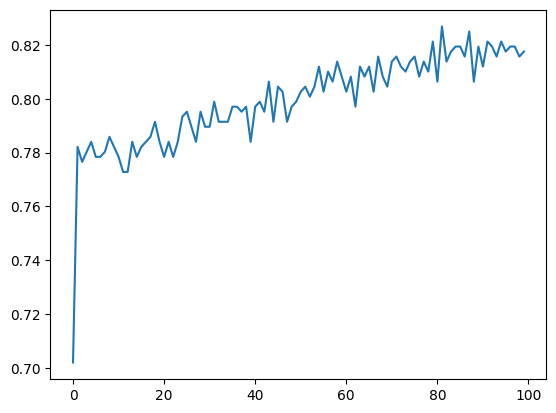

In [250]:
plt.plot(acc['accuracy'])

In [251]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7446
Model loss on test set: 0.5691404938697815
Model accuracy on test set: 74.46%


In [252]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

8/8 [==============================] - 0s 1ms/step


array([[120,  31],
       [ 28,  52]], dtype=int64)

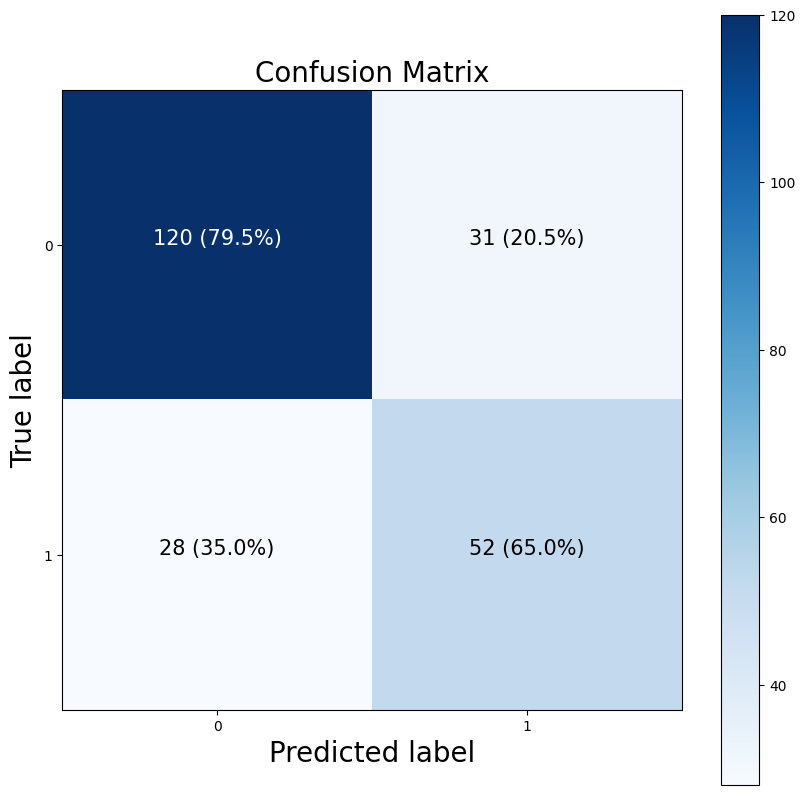

In [253]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)